In [2]:
import numpy as np
from returns.maybe import Maybe, Some, Nothing
from numerical_methods.linear_direct_methods import (
    gaussian_elimination,
    back_substitution,
    lu_decomposition,
    lu_solve,
    gauss_solve,
)
import time
import pandas as pd
from returns.curry import partial

In [3]:
A = np.matrix([[2, 4, 5], [7, 6, 5], [9, 11, 3]], dtype=float)
b = np.array([3, 2, 1]).reshape((3, 1))
U, L = lu_decomposition(A).unwrap()
L, U


(array([[1.   , 0.   , 0.   ],
        [3.5  , 1.   , 0.   ],
        [4.5  , 0.875, 1.   ]]),
 matrix([[  2.    ,   4.    ,   5.    ],
         [  0.    ,  -8.    , -12.5   ],
         [  0.    ,   0.    ,  -8.5625]]))

In [4]:
gaussian_elimination(A, pivot="partial").unwrap()

(matrix([[ 9.        , 11.        ,  3.        ],
         [ 0.        , -2.55555556,  2.66666667],
         [ 0.        ,  0.        ,  5.95652174]]),
 array([[ 1.        ,  0.        ,  0.        ],
        [ 0.77777778,  1.        ,  0.        ],
        [ 0.22222222, -0.60869565,  1.        ]]))

In [5]:
mat, _ = gaussian_elimination(np.hstack((A, b))).unwrap()
back_substitution(mat[:, :-1], mat[:, [-1]])


array([[-0.25547445],
       [ 0.13868613],
       [ 0.59124088]])

In [6]:
gauss_solve(A, b)


<Some: [[-0.25547445]
 [ 0.13868613]
 [ 0.59124088]]>

In [7]:
lu_solve(L, U, b)


array([[-0.25547445],
       [ 0.13868613],
       [ 0.59124088]])

In [8]:
def get_err(n, m = 100):
    x1_errs = []
    x2_errs = []
    x3_errs = []
    x1_time = []
    x2_time = []
    x3_time = []

    for _ in range(m):
        A = 5 * np.eye(n) + np.random.normal(size=(n, n))
        b = np.random.normal(size=(n, 1))
        
        x1_start = time.time()
        x1 = gauss_solve(A, b).unwrap()
        x1_time.append(time.time() - x1_start)
        
        x2_start = time.time()
        U, L = lu_decomposition(A).unwrap()
        x2 = lu_solve(L, U, b)
        x2_time.append(time.time() - x2_start)

        x3_start = time.time()
        x3 = np.linalg.solve(A, b)
        x3_time.append(time.time() - x3_start)
        
        x1_errs.append(np.linalg.norm(A @ x1 - b))
        x2_errs.append(np.linalg.norm(A @ x2 - b))
        x3_errs.append(np.linalg.norm(A @ x3 - b))
    
    return map(np.mean, [x1_errs, x2_errs, x3_errs, x1_time, x2_time, x3_time])

In [9]:
ns = [50, 100, 250, 500]
ts = list(zip(*map(partial(get_err, m=10), ns)))

In [10]:
err_df = pd.DataFrame({
    "n": ns,
    "GE": ts[0],
    "LU": ts[1],
})
err_df

,n,GE,LU
0,50,1.505011e-13,1.422442e-13
1,100,7.644834e-12,8.885530e-12
2,250,5.466348e-10,3.608714e-10
3,500,1.334846e-09,1.112891e-09


In [11]:
print(err_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    n &            GE &            LU \\
\midrule
0 &   50 &  1.505011e-13 &  1.422442e-13 \\
1 &  100 &  7.644834e-12 &  8.885530e-12 \\
2 &  250 &  5.466348e-10 &  3.608714e-10 \\
3 &  500 &  1.334846e-09 &  1.112891e-09 \\
\bottomrule
\end{tabular}



/var/folders/tc/kg28gjm16xgc5t5lyfvh_5sw0000gn/T/ipykernel_50645/3314175054.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(err_df.to_latex())


<AxesSubplot:title={'center':'execution time'}, xlabel='n', ylabel='sec'>

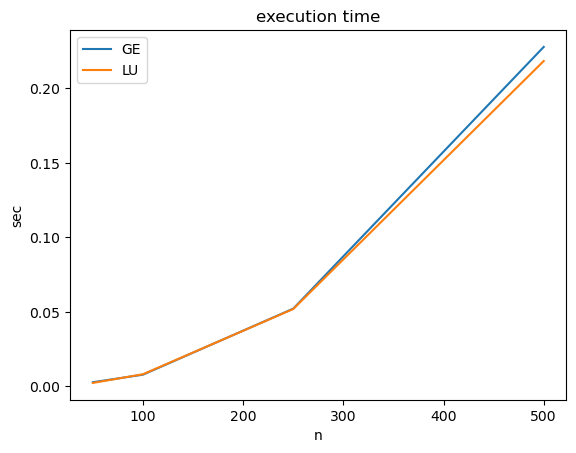

In [12]:
exec_time = pd.DataFrame({
    "n": ns,
    "GE": ts[3],
    "LU": ts[4],
    "NP": ts[5]
})
exec_time.plot(
    x="n",
    y=["GE", "LU"],
    title="execution time",
    legend=True,
    ylabel="sec",
)


In [13]:
def get_err_R(n, m = 100):
    x1_errs = []
    x2_errs = []
    x3_errs = []
    x1_time = []
    x2_time = []
    x3_time = []

    for _ in range(m):
        A = np.random.normal(size=(n, n))
        b = np.random.normal(size=(n, 1))
        
        x1_start = time.time()
        x1 = gauss_solve(A, b).unwrap()
        x1_time.append(time.time() - x1_start)
        
        x2_start = time.time()
        U, L = lu_decomposition(A).unwrap()
        x2 = lu_solve(L, U, b)
        x2_time.append(time.time() - x2_start)

        x3_start = time.time()
        x3 = np.linalg.solve(A, b)
        x3_time.append(time.time() - x3_start)
        
        x1_errs.append(np.linalg.norm(A @ x1 - b))
        x2_errs.append(np.linalg.norm(A @ x2 - b))
        x3_errs.append(np.linalg.norm(A @ x3 - b))
    
    return map(np.mean, [x1_errs, x2_errs, x3_errs, x1_time, x2_time, x3_time])

In [14]:

ns = [50, 100, 250, 500]
ts = list(zip(*map(partial(get_err_R, m=10), ns)))

In [15]:
err_df_R = pd.DataFrame({
    "n": ns,
    "GE": ts[0],
    "LU": ts[1],
})
err_df_R

,n,GE,LU
0,50,3.564803e-11,3.145187e-11
1,100,4.906939e-11,2.390745e-11
2,250,1.890665e-09,1.223007e-09
3,500,1.799276e-09,1.455843e-09


In [17]:
print(err_df_R.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    n &            GE &            LU \\
\midrule
0 &   50 &  3.564803e-11 &  3.145187e-11 \\
1 &  100 &  4.906939e-11 &  2.390745e-11 \\
2 &  250 &  1.890665e-09 &  1.223007e-09 \\
3 &  500 &  1.799276e-09 &  1.455843e-09 \\
\bottomrule
\end{tabular}



/var/folders/tc/kg28gjm16xgc5t5lyfvh_5sw0000gn/T/ipykernel_50645/4168348787.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(err_df_R.to_latex())


<AxesSubplot:title={'center':'execution time'}, xlabel='n', ylabel='sec'>

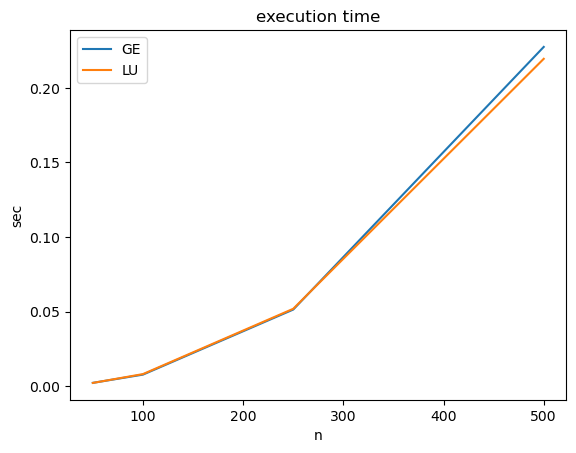

In [16]:
exec_time_R = pd.DataFrame({
    "n": ns,
    "GE": ts[3],
    "LU": ts[4],
    "NP": ts[5]
})
exec_time_R.plot(
    x="n",
    y=["GE", "LU"],
    title="execution time",
    legend=True,
    ylabel="sec",
)

